## Web APIs

As revision from yesterday a we API is a contract between systems - if you send a request in a particular formatthen the API will respond in a known format.


In [3]:
# %load D:/Notebooks/extras/connection_information.txt
# dog API
dog_url = "https://dog.ceo/api/breeds/image/random"

# open weather map API
api_key = "d1741b0c4ca70aeb629424a1ddcf28a1"
openweather_url = "https://api.openweathermap.org/data/2.5/weather"
q = "{city_name},{country_code}"

# database connection

host = "training-db.pythoncharmers.com"
port = 5432
database = "training"
username = "trainee"
password = ''
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"


In [19]:
import requests

In [20]:
requests.get?

In [21]:
session =requests.Session()

In [24]:
session.proxies ={
    'http':'localhost:3128',
    'https':'localhost:3128'
}

In [25]:
session.get('https://www.tmr.qld.gov.au')

<Response [200]>

In [26]:
getParameters = {
    'appid':api_key,
    'q':"Brisbane"
}

In [27]:
session.get(openweather_url,params=getParameters)

<Response [200]>

In [29]:
response = session.get(openweather_url,params=getParameters)

In [30]:
response.headers['Content-Type']

'application/json; charset=utf-8'

In [35]:
response.json()

{'coord': {'lon': 153.02, 'lat': -27.47},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 294.59,
  'pressure': 1028,
  'humidity': 82,
  'temp_min': 292.04,
  'temp_max': 297.04},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1569887073,
 'sys': {'type': 1,
  'id': 9485,
  'message': 0.0066,
  'country': 'AU',
  'sunrise': 1569871679,
  'sunset': 1569916055},
 'timezone': 36000,
 'id': 2174003,
 'name': 'Brisbane',
 'cod': 200}

{'coord': {'lon': 153.02, 'lat': -27.47},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 294.59,
  'pressure': 1028,
  'humidity': 82,
  'temp_min': 292.04,
  'temp_max': 297.04},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1569887073,
 'sys': {'type': 1,
  'id': 9485,
  'message': 0.0066,
  'country': 'AU',
  'sunrise': 1569871679,
  'sunset': 1569916055},
 'timezone': 36000,
 'id': 2174003,
 'name': 'Brisbane',
 'cod': 200}

In [36]:
weather = response.json()

In [37]:
weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [40]:
weather['main']['temp']

294.59

In [42]:
getParameters['q'] = 'Melbourne'

In [43]:
response = session.get(openweather_url,params=getParameters)
weather = response.json()
weather['main']['temp']

286.32

## Exercise: Using a rest API

1. Pick the city you've been to thats furthes from Brisbane

In [47]:
getParameters['q'] = 'Apia'

In [50]:
response = session.get(openweather_url,params=getParameters)
weather = response.json()
weather['main']['temp']

25

In [69]:
getParameters['units'] = 'metric'

In [85]:
def getCityTemp(city, countryCode='AU'):
    """Use the OpenWeaatherMap API to get the 
    current temperature for a given city
    
    Examples:
    >getTemperture('Brisbane')
    >getTemperature ('London', ContryCode ='GB')"""
    
    getParameters['q']= city +' ,' + countryCode
    response = session.get(openweather_url,params=getParameters)
    weather = response.json()
    return weather['main']['temp']

In [86]:
getCityTemp('Perth', countryCode = 'AU')

16.24

In [99]:
cities = ['Brisbane','Melboure','Sydney','Perth','Hobart']

In [100]:
cities = ['Perth','Melbourne','Sydney']
cityTemp = {}
for cityName in cities:
    cityTemp[cityName] = getCityTemp(cityName)

## Working with tabular data in Python

In [101]:
import pandas as pd

In [102]:
%matplotlib inline

In [103]:
pd.read_csv('D:/Data/olympics2012.csv')

,Country,Gold,Silver,Bronze
0,Afghanistan,0,0,1
1,Albania,0,0,0
2,Algeria,1,0,0
3,American Virgin Islands,0,0,0
4,Andorra,0,0,0
5,Angola,0,0,0
6,Antigua and Barbuda,0,0,0
7,Argentina,1,1,2
8,Armenia,0,1,2
9,Aruba,0,0,0


In [106]:
%cd D:/Data

D:\Data


In [110]:
olympics=pd.read_csv('olympics2012.csv')

In [111]:
type(olympics)

pandas.core.frame.DataFrame

In [112]:
olympics.describe()

,Gold,Silver,Bronze
count,204.000000,204.000000,204.000000
mean,1.480392,1.441176,1.745098
std,5.213152,4.145324,4.398133
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000
max,46.000000,29.000000,32.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C552048>,
      dtype=object)

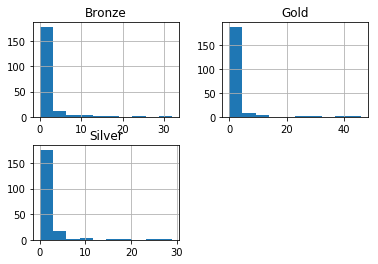

In [113]:
olympics.hist()

In [114]:
olympics=pd.read_csv('olympics2012.csv', index_col ='Country')

In [115]:
olympics.head()

,Gold,Silver,Bronze
Country,,,
Afghanistan,0,0,1
Albania,0,0,0
Algeria,1,0,0
American Virgin Islands,0,0,0
Andorra,0,0,0


In [117]:
olympics.columns

Index(['Gold', 'Silver', 'Bronze'], dtype='object')

In [118]:
olympics.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Virgin Islands',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba',
       ...
       'United Arab Emirates', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=204)

In [119]:
olympics['Gold']

Country
Afghanistan                  0
Albania                      0
Algeria                      1
American Virgin Islands      0
Andorra                      0
Angola                       0
Antigua and Barbuda          0
Argentina                    1
Armenia                      0
Aruba                        0
Australia                    7
Austria                      0
Azerbaijan                   2
Bahamas                      1
Bahrain                      0
Bangladesh                   0
Barbados                     0
Belarus                      2
Belgium                      0
Belize                       0
Benin                        0
Bermuda                      0
Bhutan                       0
Bolivia                      0
Bosnia and Herzegovina       0
Botswana                     0
Brazil                       3
British Virgin Islands       0
Brunei Darussalam            0
Bulgaria                     0
                            ..
Sudan                        0


## Exercise: Calculating the toal number of medals won by each county

You know how to index out a column. What happens when you add the gold Colum to the silber column?

Create a total column by adding the gold, silver and Bronze comlumns together

In [120]:
olympics['total']= olympics['Gold']+olympics['Silver']+olympics['Bronze']

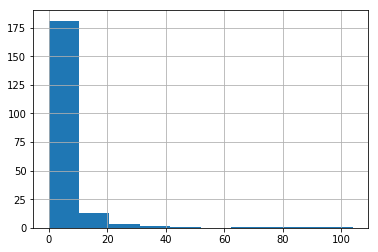

In [123]:
olympics['total'].hist()

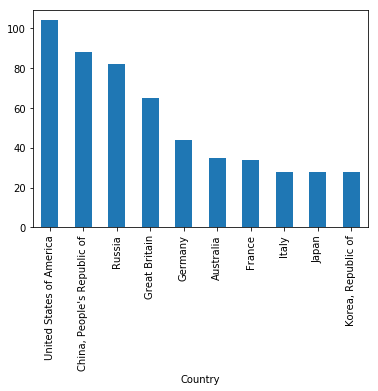

In [125]:
olympics['total'].nlargest(10).plot(kind='bar')

In [126]:
olympics.sample(5)

,Gold,Silver,Bronze,total
Country,,,,
Japan,7,4,17,28
Thailand,0,2,1,3
Mauritius,0,0,0,0
Colombia,1,3,4,8
Kenya,2,4,5,11


In [127]:
population = pd.read_csv(
    'country_populations_by_year.csv',
    index_col ='Country Name')

In [129]:
population.sample(5)

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Cabo Verde,CPV,"Population, total",SP.POP.TOTL,202310.0,205956.0,210867.0,216908.0,223846.0,231428.0,239770.0,...,491723.0,496963.0,502384.0,508067.0,513979.0,520106.0,526437.0,532913.0,539560.0,546388.0
Sri Lanka,LKA,"Population, total",SP.POP.TOTL,9874481.0,10111646.0,10352188.0,10597520.0,10849979.0,11110828.0,11380683.0,...,19945832.0,20075086.0,20198353.0,20315017.0,20425000.0,20585000.0,20771000.0,20966000.0,21203000.0,21444000.0
Singapore,SGP,"Population, total",SP.POP.TOTL,1646400.0,1702400.0,1750200.0,1795000.0,1841600.0,1886900.0,1934400.0,...,4839396.0,4987573.0,5076732.0,5183688.0,5312437.0,5399162.0,5469724.0,5535002.0,5607283.0,5612253.0
Germany,DEU,"Population, total",SP.POP.TOTL,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,...,82110097.0,81902307.0,81776930.0,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82348669.0,82695000.0
Lithuania,LTU,"Population, total",SP.POP.TOTL,2778550.0,2823550.0,2863350.0,2898950.0,2935200.0,2971450.0,3008050.0,...,3198231.0,3162916.0,3097282.0,3028115.0,2987773.0,2957689.0,2932367.0,2904910.0,2868231.0,2827721.0


In [130]:
compCountryPopMedals = olympics['total']/population['2012']

In [133]:
compCountryPopMedals.nlargest(10)

Grenada                0.000009
Jamaica                0.000004
Trinidad and Tobago    0.000003
New Zealand            0.000003
Slovenia               0.000002
Georgia                0.000002
Mongolia               0.000002
Hungary                0.000002
Lithuania              0.000002
Montenegro             0.000002
dtype: float64

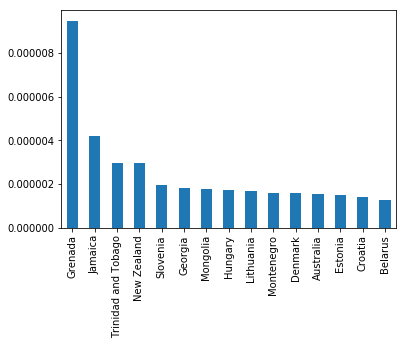

In [135]:
compCountryPopMedals.nlargest(15).plot(kind='bar')

In [136]:
len(compCountryPopMedals)

296

In [137]:
len(population)

264

In [141]:
len(olympics)

204

In [139]:
olympics['medalsPerPerson']= compCountryPopMedals

In [140]:
olympics

,Gold,Silver,Bronze,total,medalsPerPerson
Country,,,,,
Afghanistan,0,0,1,1,3.257652e-08
Albania,0,0,0,0,0.000000e+00
Algeria,1,0,0,1,2.661992e-08
American Virgin Islands,0,0,0,0,NaN
Andorra,0,0,0,0,0.000000e+00
Angola,0,0,0,0,0.000000e+00
Antigua and Barbuda,0,0,0,0,0.000000e+00
Argentina,1,1,2,4,9.501924e-08
Armenia,0,1,2,3,1.040972e-06


## Tip

Matching inddexs can be quite hard.  If you cant do this manual there are tools that will help i.e scoring strings metrics using the "jellyfish" library.

In [145]:
olympics.index.difference(population.index)

Index(['American Virgin Islands', 'Bahamas', 'Burma (Myanmar)', 'Cape Verde',
       'China, People's Republic of', 'Congo',
       'Congo, the Democratic Republic of the', 'Cook Islands', 'DPR Korea',
       'Egypt', 'Former Yugoslav Republic of Macedonia', 'Gambia',
       'Gaza Strip/Palestine/West Bank', 'Great Britain', 'Hong Kong', 'Iran',
       'Korea, Republic of', 'Kyrgyzstan', 'Laos', 'Micronesia', 'Russia',
       'Samoa, American', 'Slovakia', 'St Kitts and Nevis', 'St Lucia',
       'St Vincent and the Grenadines', 'Syria', 'Taiwan(2)',
       'United States of America', 'Venezuela', 'Viet Nam', 'Yemen'],
      dtype='object')

In [146]:
population.index.difference(olympics.index)

Index(['American Samoa', 'Arab World', 'Bahamas, The', 'Cabo Verde',
       'Caribbean small states', 'Central Europe and the Baltics',
       'Channel Islands', 'China', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Curacao', 'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.',
       'Euro area', 'Europe & Central Asia',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Faroe Islands', 'Fragile and conflict affected situations',
       'French Polynesia', 'Gambia, The', 'Gibraltar', 'Greenland',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend',
       'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republi

At some point youll need a mapping of one value to another value. this is a python dictionary

In [147]:
countryNameMapping = {
    'Viet Nam' : 'Vietnam',
    'United States of America' : 'United States'
}

In [149]:
olympics=olympics.rename(index=countryNameMapping)

In [150]:
%cd T:\Python Training\

T:\Python Training


In [151]:
pd.read_excel('training_data_Mobile_Phone_offences.xlsx')

,Infringement notices and charged offences issued to 305 CRNs (Double Demerit Point Mobile Phone offence recipients in 2018) from 01/01/2008 to 30/06/2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Unique_Id,Offence Date,QT Offence ID,Offence Code,Offence Description,Type - Category 1,Latest Offence Status
1,10001,2008-02-13 00:00:00,33414410,2499,EXCEED SPEED LIMIT IN SPEED ZONE BY LESS THAN ...,Speeding - Non-Camera,PAID
2,10001,2009-07-28 00:00:00,742743610,2323,DRIVER USE HAND HELD MOBILE PHONE,Mobile Phone Offence,PAID
3,10001,2010-10-25 00:00:00,684712810,2500,EXCEED SPEED LIMIT IN SPEED ZONE BY AT LEAST 1...,Speeding - Non-Camera,PAID
4,10001,2011-03-05 00:00:00,21296810,2556,EXCEED SPEED LIMIT IN SPEED ZONE BY AT LEAST 1...,Speeding - Mobile Camera,PAID
5,10001,2011-12-20 00:00:00,162469910,2499,EXCEED SPEED LIMIT IN SPEED ZONE BY LESS THAN ...,Speeding - Non-Camera,FINSPER
6,10001,2012-05-27 00:00:00,229347020,2558,EXCEED SPEED LIMIT IN SPEED ZONE BY MORE THAN ...,Speeding - Mobile Camera,VIPSPER
7,10001,2014-02-24 00:00:00,903998320,2323,DRIVER USE HAND HELD MOBILE PHONE,Mobile Phone Offence,VIPSPER
8,10001,2016-06-11 00:00:00,708032130,2556,EXCEED SPEED LIMIT IN SPEED ZONE BY AT LEAST 1...,Speeding - Mobile Camera,PAID
9,10001,2017-07-03 00:00:00,872807230,2500,EXCEED SPEED LIMIT IN SPEED ZONE BY AT LEAST 1...,Speeding - Non-Camera,PAID


### Reading the mobile phone offences so its more usable

1. Take a look at the hlep for `pd.read_excel` - there is a lot of optional keyword arguments.
2. Using the help (skip the first row of data) 
3. Set the object_id as indexs column `

In [158]:
mobile = pd.read_excel('training_data_Mobile_Phone_offences.xlsx',
skiprows=1,
skipfooter=1,
index_col = 'Unique_Id',
parse_dates = ['Offence Date']
)

In [159]:
len(mobile)

5275

mobile.dtypes

In [160]:
mobile.dtypes

Offence Date             datetime64[ns]
QT Offence ID                     int64
Offence Code                     object
Offence Description              object
Type - Category 1                object
Latest Offence Status            object
dtype: object